In [2]:
#Name=Vipul Anand
#Project-2
#Batch=DS2312
#Title=Medical Cost Personal Insurance Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [77]:
#The shape of the data
data.shape

(1329, 12)

In [5]:
#The dataset
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#checking if there are null values in the data or not
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#so there are no null values in the data

In [8]:
#so let us now check the datatype of the columns
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#the value counts of each of the column
print(data.value_counts())

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64


In [10]:
for i in data:
    print(data[i].value_counts())

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
16884.92400    1
29330.98315   

<Axes: >

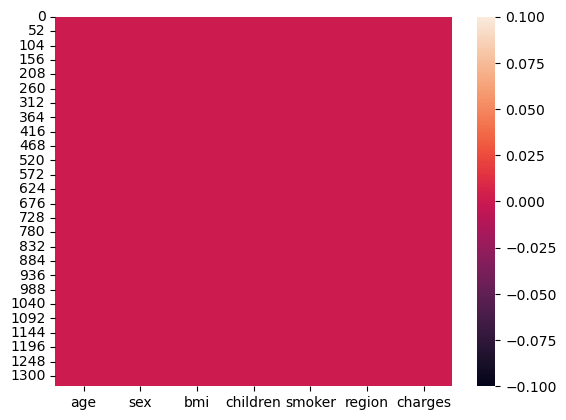

In [11]:
#plotting the heatmap to show if there are any nulls in the data
sns.heatmap(data.isna())

In [18]:
#so from the graph it is clear that the data has no null values

In [12]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [20]:
#So from this the data looks relevant consisting of both categorrical and continous columns

In [13]:
#let us see the statistical analysis of the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
#from this the data looks clean but still let us plot the distribution plot to see

In [14]:
numerical_columns=[]
for i in data:
    if data[i].dtype!='object':
        numerical_columns.append(i)

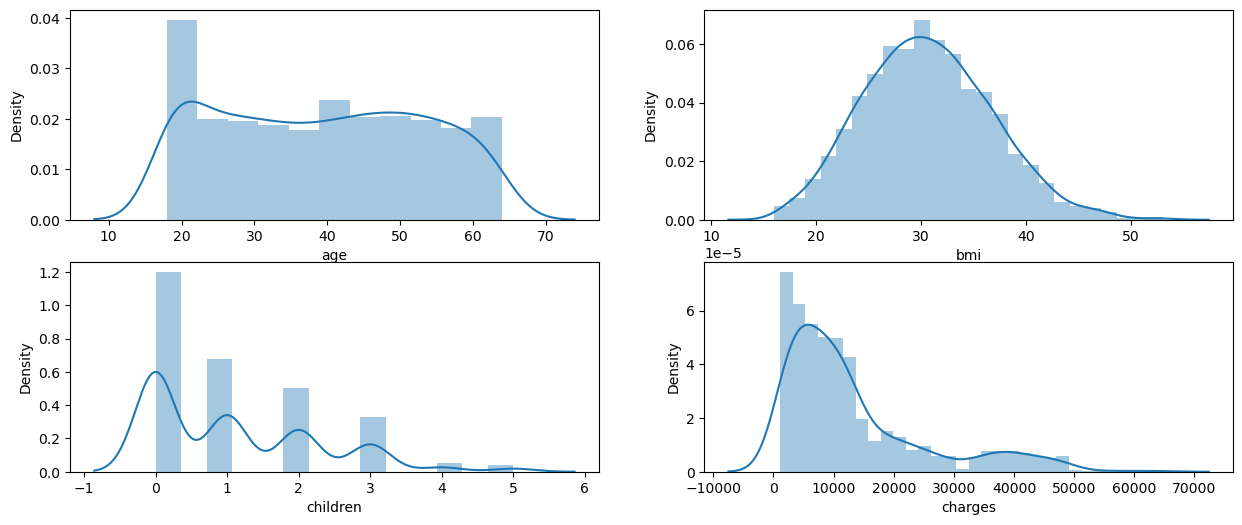

In [15]:
plt.figure(figsize=(15,6))
plotnumber=1
for i in numerical_columns:
    plt.subplot(2,2,plotnumber)
    sns.distplot(data[i])
    plotnumber+=1
plt.show()

In [29]:
#it seems that the they have little bit of outliers so let us plot the box plot to see that

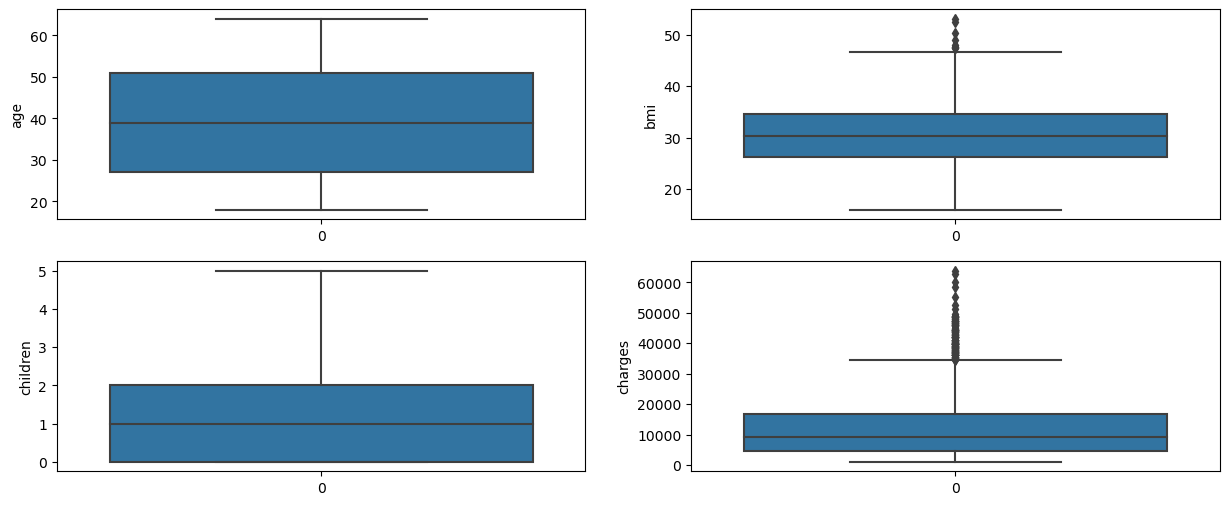

In [16]:
plt.figure(figsize=(15,6))
plotnumber=1
for i in numerical_columns:
    plt.subplot(2,2,plotnumber)
    sns.boxplot(data[i])
    plt.ylabel(i)
    plotnumber+=1
plt.show()

In [33]:
#so there is a little but of outlier in the bmi and charges
#as charges is our label so we will not distrub that but will remove the outlier of the bmi

In [17]:
q1=data['bmi'].quantile(0.25)
q3=data['bmi'].quantile(0.75)
iqr=q3-q1

In [18]:
#so he bmi has outliers in the upper side of the graph so we will calculate this with
outlier=q3+(1.5)*iqr
print(outlier)

47.290000000000006


In [19]:
index=data[data['bmi']>outlier].index

In [20]:
data.drop(index=index,inplace=True)

In [21]:
data.reset_index(drop=True,inplace=True)

In [22]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830
1325,18,female,31.920,0,no,northeast,2205.98080
1326,18,female,36.850,0,no,southeast,1629.83350
1327,21,female,25.800,0,no,southwest,2007.94500


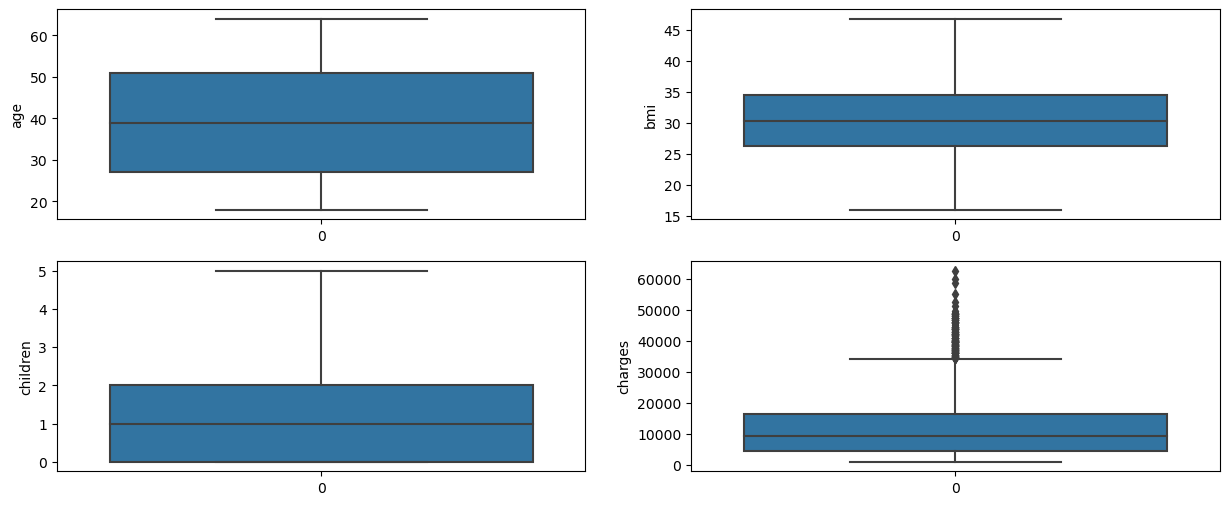

In [23]:
plt.figure(figsize=(15,6))
plotnumber=1
for i in numerical_columns:
    plt.subplot(2,2,plotnumber)
    sns.boxplot(data[i])
    plt.ylabel(i)
    plotnumber+=1
plt.show()

In [53]:
#clearly we can see that now the outliers are removed from the dataset

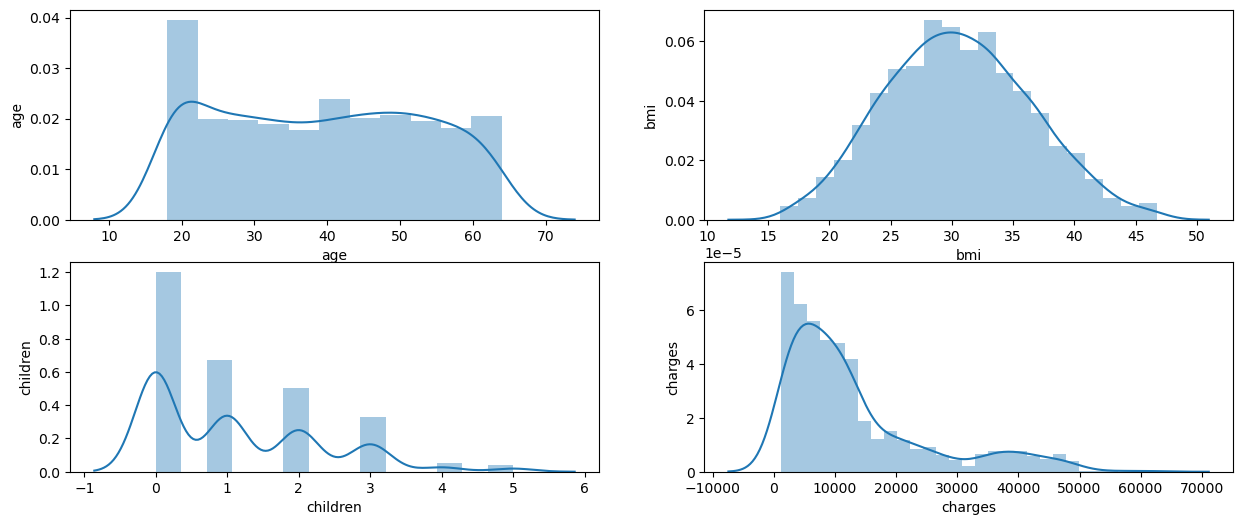

In [24]:
plt.figure(figsize=(15,6))
plotnumber=1
for i in numerical_columns:
    plt.subplot(2,2,plotnumber)
    sns.distplot(data[i])
    plt.ylabel(i)
    plotnumber+=1
plt.show()

In [55]:
#the distribution also improved

In [25]:
#the information of the dataste
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 72.8+ KB


In [26]:
categrical_columns=[]
for i in data:
    if data[i].dtype=='object':
        categrical_columns.append(i)
print(categrical_columns)

['sex', 'smoker', 'region']


In [27]:
#now let us convert the categorical columns into numerical columns
from sklearn.preprocessing import OneHotEncoder

In [28]:
onc=OneHotEncoder()

In [29]:
for i in categrical_columns:
    a=pd.get_dummies(data[i])
    data=pd.concat([data,a],axis=1)
    data.drop(columns=i)
data

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,True,False,False,True,False,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,False,True,True,False,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,False,True,True,False,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,False,True,True,False,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830,False,True,True,False,False,True,False,False
1325,18,female,31.920,0,no,northeast,2205.98080,True,False,True,False,True,False,False,False
1326,18,female,36.850,0,no,southeast,1629.83350,True,False,True,False,False,False,True,False
1327,21,female,25.800,0,no,southwest,2007.94500,True,False,True,False,False,False,False,True


In [30]:
data.drop(columns=categrical_columns,inplace=True)

In [31]:
data

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1325,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1326,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1327,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [32]:
#now let us replace the True and False with 0 and 1
for i in data:
    data[i].replace({True:1,False:0},inplace=True)
data

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1325,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1326,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1327,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [33]:
#So out encoding part is over now let us move to the correlation matrix part
corr=data.corr()

In [34]:
corr

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
age,1.000000,0.114686,0.043041,0.302022,0.019143,-0.019143,0.024505,-0.024505,0.001766,-0.000283,-0.011581,0.010474
bmi,0.114686,1.000000,0.017355,0.193196,-0.039958,0.039958,0.002871,-0.002871,-0.136193,-0.128598,0.255863,0.000651
children,0.043041,0.017355,1.000000,0.069739,-0.019281,0.019281,-0.007577,0.007577,-0.024857,0.024209,-0.018816,0.020021
charges,0.302022,0.193196,0.069739,1.000000,-0.063394,0.063394,-0.785912,0.785912,0.009750,-0.037704,0.071597,-0.045906
female,0.019143,-0.039958,-0.019281,-0.063394,1.000000,-1.000000,0.079854,-0.079854,-0.000573,0.009961,-0.010263,0.001195
male,-0.019143,0.039958,0.019281,0.063394,-1.000000,1.000000,-0.079854,0.079854,0.000573,-0.009961,0.010263,-0.001195
no,0.024505,0.002871,-0.007577,-0.785912,0.079854,-0.079854,1.000000,-1.000000,-0.004947,0.035940,-0.068270,0.039440
yes,-0.024505,-0.002871,0.007577,0.785912,-0.079854,0.079854,-1.000000,1.000000,0.004947,-0.035940,0.068270,-0.039440
northeast,0.001766,-0.136193,-0.024857,0.009750,-0.000573,0.000573,-0.004947,0.004947,1.000000,-0.322387,-0.343402,-0.321730
northwest,-0.000283,-0.128598,0.024209,-0.037704,0.009961,-0.009961,0.035940,-0.035940,-0.322387,1.000000,-0.344807,-0.323046


<Axes: >

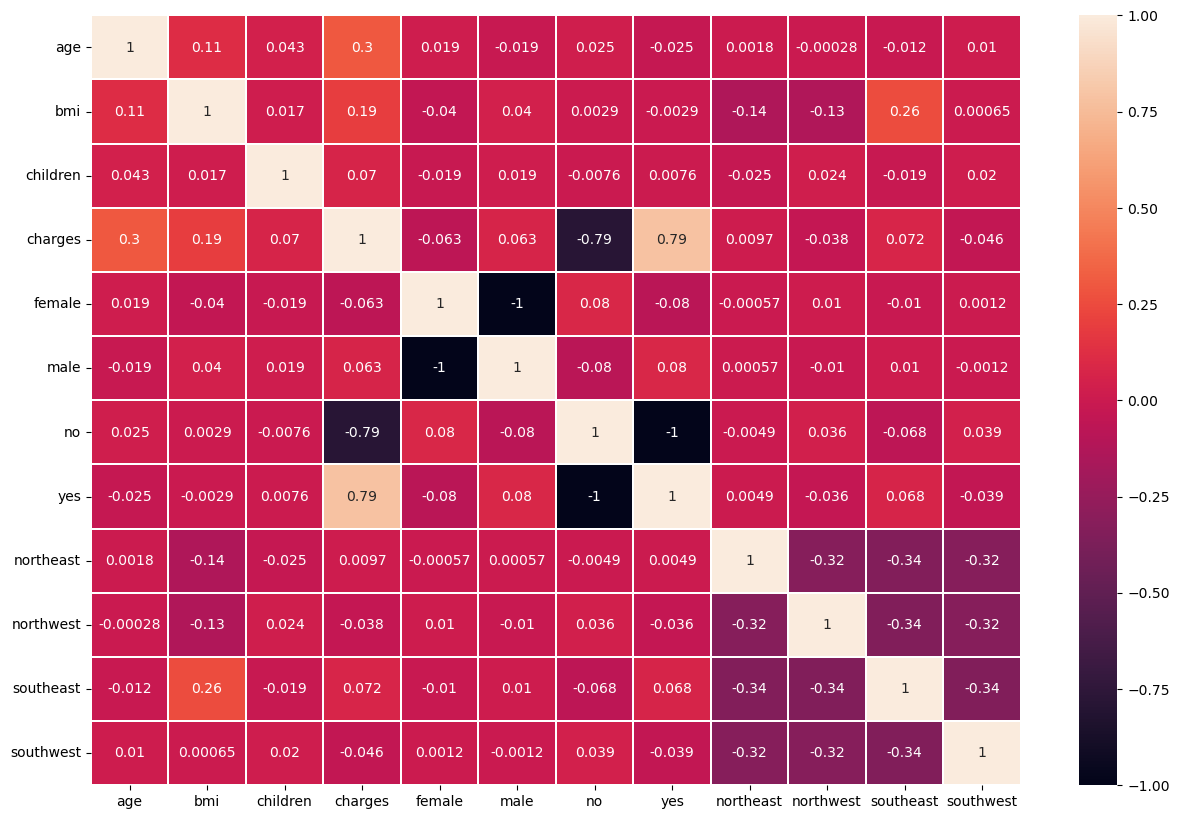

In [35]:
#let us visualize through thr heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,linewidths=0.1)

In [36]:
data.skew()
#the skewness of the numerical columns are balanced

age          0.058413
bmi          0.157180
children     0.936628
charges      1.500577
female       0.016573
male        -0.016573
no          -1.471424
yes          1.471424
northeast    1.199530
northwest    1.190013
southeast    1.045198
southwest    1.194764
dtype: float64

In [37]:
corr['charges'].sort_values(ascending=False)

charges      1.000000
yes          0.785912
age          0.302022
bmi          0.193196
southeast    0.071597
children     0.069739
male         0.063394
northeast    0.009750
northwest   -0.037704
southwest   -0.045906
female      -0.063394
no          -0.785912
Name: charges, dtype: float64

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
#dividing the dataset
x=data.drop(columns='charges')
y=data['charges']

In [40]:
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [123]:
#let us see the variance inflation factor

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

In [42]:
vif['vif']=[variance_inflation_factor(x_scaled.values,i) for i in range(11)]
vif['columns']=x.columns

In [43]:
vif
#so the variance is clean

,vif,columns
0,1.017899,age
1,1.099198,bmi
2,1.004071,children
3,inf,female
4,inf,male
5,inf,no
6,inf,yes
7,inf,northeast
8,inf,northwest
9,inf,southeast


In [44]:
corr['charges'].sort_values(ascending=False)

charges      1.000000
yes          0.785912
age          0.302022
bmi          0.193196
southeast    0.071597
children     0.069739
male         0.063394
northeast    0.009750
northwest   -0.037704
southwest   -0.045906
female      -0.063394
no          -0.785912
Name: charges, dtype: float64

In [45]:
x_scaled.corrwith(y).sort_values(ascending=False)

yes          0.785912
age          0.302022
bmi          0.193196
southeast    0.071597
children     0.069739
male         0.063394
northeast    0.009750
northwest   -0.037704
southwest   -0.045906
female      -0.063394
no          -0.785912
dtype: float64

In [137]:
#we are done with all the preprocessing steps

In [46]:
from sklearn.model_selection import train_test_split

In [140]:
#let us now prepare our model

In [52]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.model_selection import cross_val_score    

In [53]:
# we will use the linear regression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8116731313980972 86


In [62]:
#since the best accuracy is 0.811 and best random state is 86 so let us just proceed
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=86)

In [93]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()

In [ ]:
models=[rr,er,lr,gb,ad,bg,ri,ls]

In [80]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
print(accuracy)

{RandomForestRegressor(): 0.8966715537504062, ExtraTreesRegressor(): 0.8780447753573105, LinearRegression(): 0.8116731313980972, GradientBoostingRegressor(): 0.9157349546593181, AdaBoostRegressor(): 0.8647071297535267, BaggingRegressor(): 0.8858448931609386, Ridge(): 0.8114424232118514, LassoCV(): 0.8116888157125672}


In [66]:
accuracy

{RandomForestRegressor(): 0.8964251926308602,
 ExtraTreesRegressor(): 0.8796454744781919,
 LinearRegression(): 0.8116731313980972,
 GradientBoostingRegressor(): 0.9156433513391897,
 AdaBoostRegressor(): 0.8661679492863695,
 BaggingRegressor(): 0.887710508509466,
 Ridge(): 0.8114424232118514,
 LassoCV(): 0.8116888157125672}

In [61]:
#Now let us verify the things with the cross validation
from sklearn.model_selection import cross_val_score

In [84]:
#the gradient boost is performing well so now let us see the cv score of it
cross_val_score(GradientBoostingRegressor(),x_scaled,y,cv=5).mean()

0.8532911478093392

In [98]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=5).mean())

RandomForestRegressor() , 0.8350589087963447
ExtraTreesRegressor() , 0.8152324999343262
LinearRegression() , 0.7450739826594394
GradientBoostingRegressor() , 0.8532792367837441
AdaBoostRegressor() , 0.8039181036249265
BaggingRegressor() , 0.816785909713506
Ridge() , 0.746134618690814
LassoCV() , 0.7450889279137135


In [ ]:
#so we can clearly see the dominance of the gradient boosting regressor

In [99]:
model=GradientBoostingRegressor()

In [101]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {
    'n_estimators': [50, 100, 150],  
    'learning_rate': [0.05, 0.1, 0.2],  
    'max_depth': [3, 4, 5],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]  
}

In [103]:
grid_search = GridSearchCV(model, param_grid, cv=5)

In [105]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.8, 1.0]})

In [106]:
grid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=4,
                          min_samples_split=10)

In [111]:
grid_search.best_score_

0.8140527828573301

In [109]:
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('The R2_score of the model is',r2_score(y_test,pred))

The R2_score of the model is 0.9156121390433012


In [112]:
#After gradient boosting
model=GradientBoostingRegressor(learning_rate=0.05,min_samples_leaf=4,min_samples_split=10)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('The R2_score of the model is',r2_score(y_test,pred))

The R2_score of the model is 0.9219148692022793


In [116]:
accuracy=r2_score(y_test,pred)
print(accuracy)

0.9219148692022793


In [121]:
#So The accuracy of our final and the best model is gradient boosting regressor
print('the final model with the best accuacy is',GradientBoostingRegressor())
print('the r2_score of the model is',r2_score(y_test,pred))
print('the mean absolute error of the model is', mean_absolute_error(y_test,pred))
print('the mean squared error of the model is', mean_squared_error(y_test,pred))
print('the root mean squared error of the model is', np.sqrt(mean_absolute_error(y_test,pred)))

the final model with the best accuacy is GradientBoostingRegressor()
the r2_score of the model is 0.9219148692022793
the mean absolute error of the model is 2171.0376057020703
the mean squared error of the model is 12328157.000420267
the root mean squared error of the model is 46.59439457383335
